
- 데이터: [KB부동산 데이터 허브](https://data.kbland.kr/) → KB 통계 → 주택가격동향조사
    - [주간 아파트 매매가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptSalePriceInx) 전체('24년 10월 7일 기준)
    - [주간 아파트 전세가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptRentPriceInx) 전체('24년 10월 7일 기준)

- 가격지수: 기준시점(22년 1월 10일) 대비 조사 시점(24년 10월)의 가격 비율 (주택별·지역별 가중)

# 환경설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,012 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and dire

# 데이터 불러오기
두 개의 엑셀파일을 읽어와서 각각 `df_sale`, `df_rent` 변수에 할당하고, shape을 확인

In [ ]:
# 코드를 작성하시오


## 데이터 구조 변경
 - 컬럼은 지역명, 인덱스는 시간 정보
 - 서울 지역만 필터링
 - 집계 데이터(예. 전국, 서울, 강북14개구 등)는 제외
 - 구조 변경 결과 shape: (831, 25)
 - 변경된 데이터는 신규 변수 `df_sale_seoul`와 `df_rent_seoul`에 할당

 (예시)


 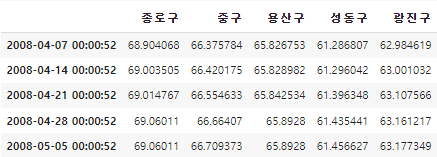

In [ ]:
# 코드를 작성하시오


## Long Form으로 변경
- `지역명`이 값으로 할당되도록 데이터 구조 변경
- 최종 구조 변경된 컬럼은 `지역명`, `매매가격지수`의 컬럼을 가지고 있음(전세 데이터는 `지역명`, `전세가격지수`의 컬럼을 가지고 있음)
- 변경한 데이터는 각각 `df_sale_seoul_long`, `df_rent_seoul_long` 에 할당
- 변경된 데이터의 shape: (20775, 2)

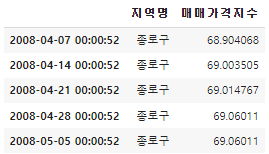

In [ ]:
# 코드를 작성하시오


# 데이터 시각화
- 전처리가 수행된 데이터 프레임  `df_sale_seoul`와 `df_rent_seoul` 또는 `df_sale_seoul_long`, `df_rent_seoul_long`을 사용하여 데이터 시각화 수행
- (예시)
    - `강남구`의 날짜별 `매매가격지수`, `전세가격지수` 시각화
    - `강남구`의 `매매가격지수`, `전세가격지수` 상관관계 시각화
    - `매매가격지수`와 `전세가격지수`의 차이가 가장 큰(적은) 지역을 판단하고, 해당 지역에 가격지수를 시각화
    - 연도별 데이터 집계하여 시각화 등
    
- 필요 시 추가 데이터 전처리 수행    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트(나눔고딕)을 기본 폰트로 사용하도록 설정
plt.rcParams["font.family"] = 'NanumGothic'

# 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

### 강남구의 날짜별 매매가격지수, 전세가격지수 시각화

In [ ]:
# 코드를 작성하시오


### 강남구의 매매가격지수, 전세가격지수 상관관계 시각화

In [ ]:
# 코드를 작성하시오


### 매매가격지수와 전세가격지수의 차이가 가장 큰(or 적은) 지역을 판단하고, 해당 지역에 가격지수를 시각화

In [ ]:
# 코드를 작성하시오


### '강남구'의 매매가격지수변동률과 전세가격지수 변동률을 구하고, 시각화

In [ ]:
# 코드를 작성하시오


### 서울 지역별 특정 시점(예. 24년 10월) 기준 전세가격지수 변동률을 히트맵으로 시각화

In [ ]:
import folium
from folium.plugins import HeatMap

# 서울시 지역구별 위경도 및 인구수를 데이터프레임으로 생성
data = {
    'district': ['강남구', '강동구', '강서구', '관악구', '광진구', '구로구',
                 '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구',
                 '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
                 '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
    'latitude': [37.4979, 37.5307, 37.5502, 37.4783, 37.5407, 37.4950,
                 37.4574, 37.6529, 37.6692, 37.5743, 37.5125, 37.5547,
                 37.5772, 37.4845, 37.5636, 37.5894, 37.5155, 37.5110,
                 37.5260, 37.5326, 37.6063, 37.5700, 37.5636, 37.6016],
    'longitude': [127.0276, 127.1237, 126.8499, 126.9515, 127.0823, 126.8824,
                  126.8956, 127.0771, 127.0335, 127.0395, 126.9810, 126.9067,
                  126.9368, 127.0322, 127.0425, 127.0117, 127.1050, 126.8642,
                  126.9035, 126.9947, 126.9280, 126.9800, 126.9970, 127.0959],
}

# 데이터프레임 생성
seoul_GIS = pd.DataFrame(data)

In [ ]:
# 코드를 작성하시오
